# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import scipy.stats as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([20, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: sc.normaltest(d))

tests

0    (0.6064061791256705, 0.7384491098337558)
1    (2.4894423911627324, 0.2880211985204002)
2    (2.374072575904565, 0.30512422569037495)
3     (0.278051084883657, 0.8702058009933302)
4     (1.002033350797613, 0.6059143282698776)
dtype: object

#### Interpret the normaltest results and make your observations.

In [3]:
# Explain the test results here


## Looking into the data: (ok after rerunning, its looking different of course. Thats sad)
### 1. Sample Size 20:
- The K2-Value is larger then in any other sample. This means that there is more values in the "tail" as well as that there is skewness within.
- The p-value is 0.19, which means its significant looking at a threshhold of 5%.
### 2. Sample Size 50:
- less skewness/tail "volume"
- more significance (p =33%)
### 3. Sample Size 500:
- least skewness/tail "volume"
- p-value of 95%
### 4. Sample Size 5000:
- its a "bad" sample.
### 5. Sample Size 50000:
- low skewness and curtosis as well as high significance for normal distribution

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

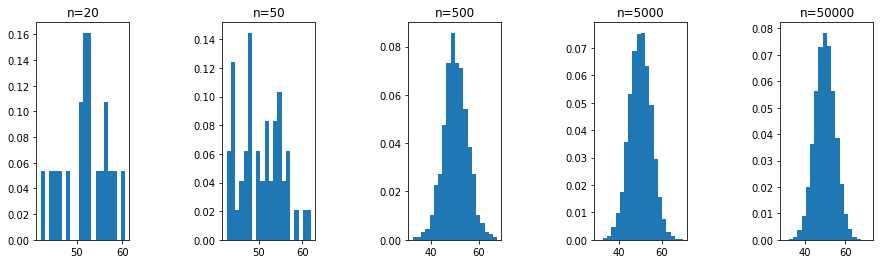

In [4]:
# Your code here
fig, ax = plt.subplots(1, 5)

fig.set_figwidth(15)

fig.subplots_adjust(wspace=1)

for i in range(0, 5):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [5]:
# Your comment and explanation here


## Comparison/Observations:
The more observations you have, the less likely it is for them to not "look like" a normal distributions. Taking into account that every observation is independent of the others, this means that in any case, if the number of samples is just large enough, it will converge into a normal distribution.
For example: Coin toss --> infinity --> expected mean is 50% heads/50% tails.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

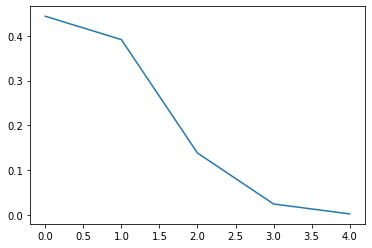

In [6]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

### Your comment here
This plot shows the probability of how many people will click on the add. If its 0 people, the probability is **0.85^5 =approx 44%**
If there is one person clicking the add, and the others are not: **0.85^4 * 0.15 * 5**
This calculation takes into account:
- 4 people dont click it
- 1 person will click it
- this 1 person can be any of those 5, the aggregated probability is the number of possibilities

This is done with the binomial equation(?!?)

#### Now plot PMP with 50, 500, and 5000 visitors.

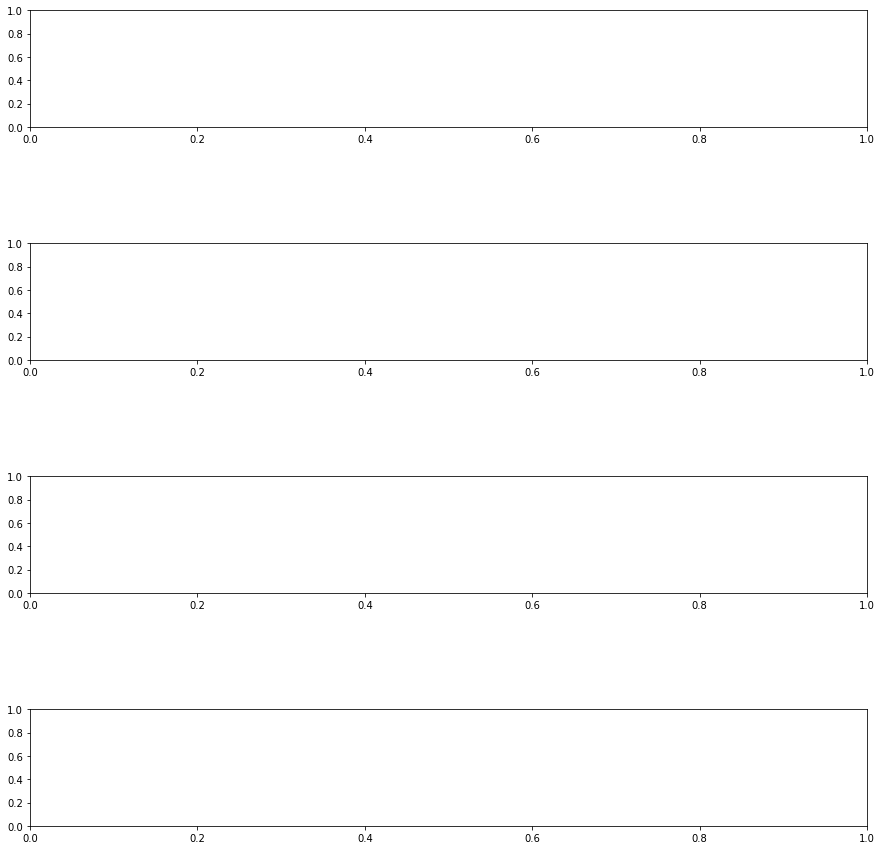

In [7]:
# Your code here
f, ax = plt.subplots(4,1)
f.set_figwidth(15)
f.set_figheight(15)
f.subplots_adjust(hspace=1)

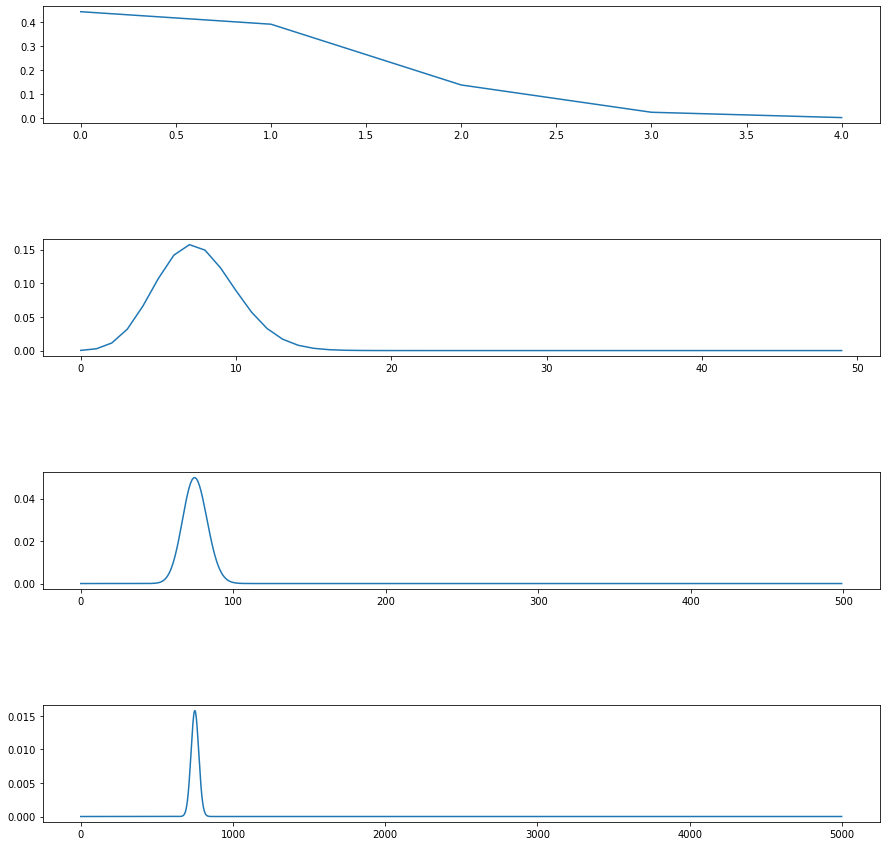

In [8]:
sample = [5, 50, 500, 5000]

dist = binom(sample[0],0.15)
ax[0].plot(range(sample[0]), dist.pmf(range(sample[0])))
dist = binom(sample[1],0.15)
ax[1].plot(range(sample[1]), dist.pmf(range(sample[1])))
dist = binom(sample[2],0.15)
ax[2].plot(range(sample[2]), dist.pmf(range(sample[2])))
dist = binom(sample[3],0.15)
ax[3].plot(range(sample[3]), dist.pmf(range(sample[3])))
f

In [33]:
ax[1].set_xlim(0,15)
ax[2].set_xlim(50,100)
ax[3].set_xlim(650,850)

(650, 850)

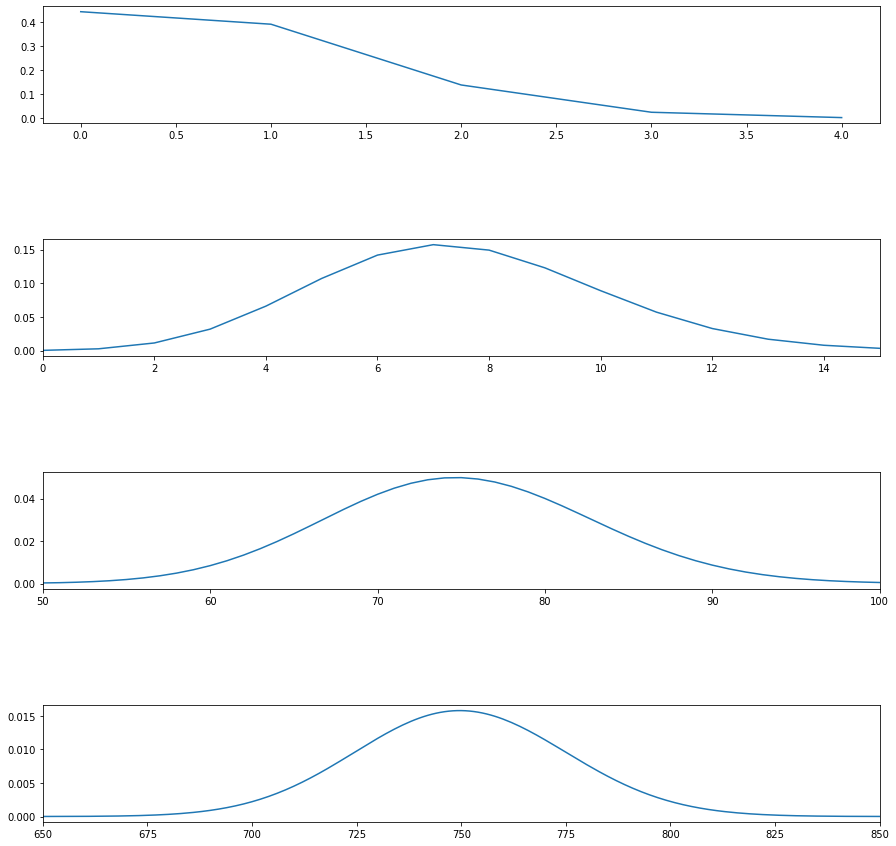

In [34]:
f

#### What did you notice from the distribution plots? Comment your findings.

In [9]:
# Your comment here

### Comments:
The more Observations you have, the more it looks like a normal distribution with the maximum sitting at your percentage of probability to click the video.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [10]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [11]:
# Your code here

#### What is the probability of getting 60 visits?

In [12]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

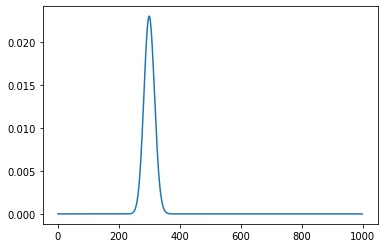

In [13]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)